   # Predicting the quality of wine

#### Submitted by:

Brandon VanRosendale   brandon.vanrosendale@trojans.dsu.edu

Carrie St Louis  carrie.stlouis@trojans.dsu.edu

Yamuna Dhungana  Yamuna.Dhungana@trojans.dsu.edu

#### Submission data : November 22, 2020

### Dataset : Red wine quality

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### Data exploration

In [2]:
# Import wine data
wine = pd.read_csv("~\\Desktop\\archive\\winequality-red.csv")
wine.head()   

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
# Dimension of data
wine.shape

(1599, 12)

In [4]:
# Check for missing values
wine.isnull().values.any()

False

In [5]:
# Information about the data set
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Summary of ecah variable
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
# Check how many unique quality is in the dataset
wine['quality'].unique()
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

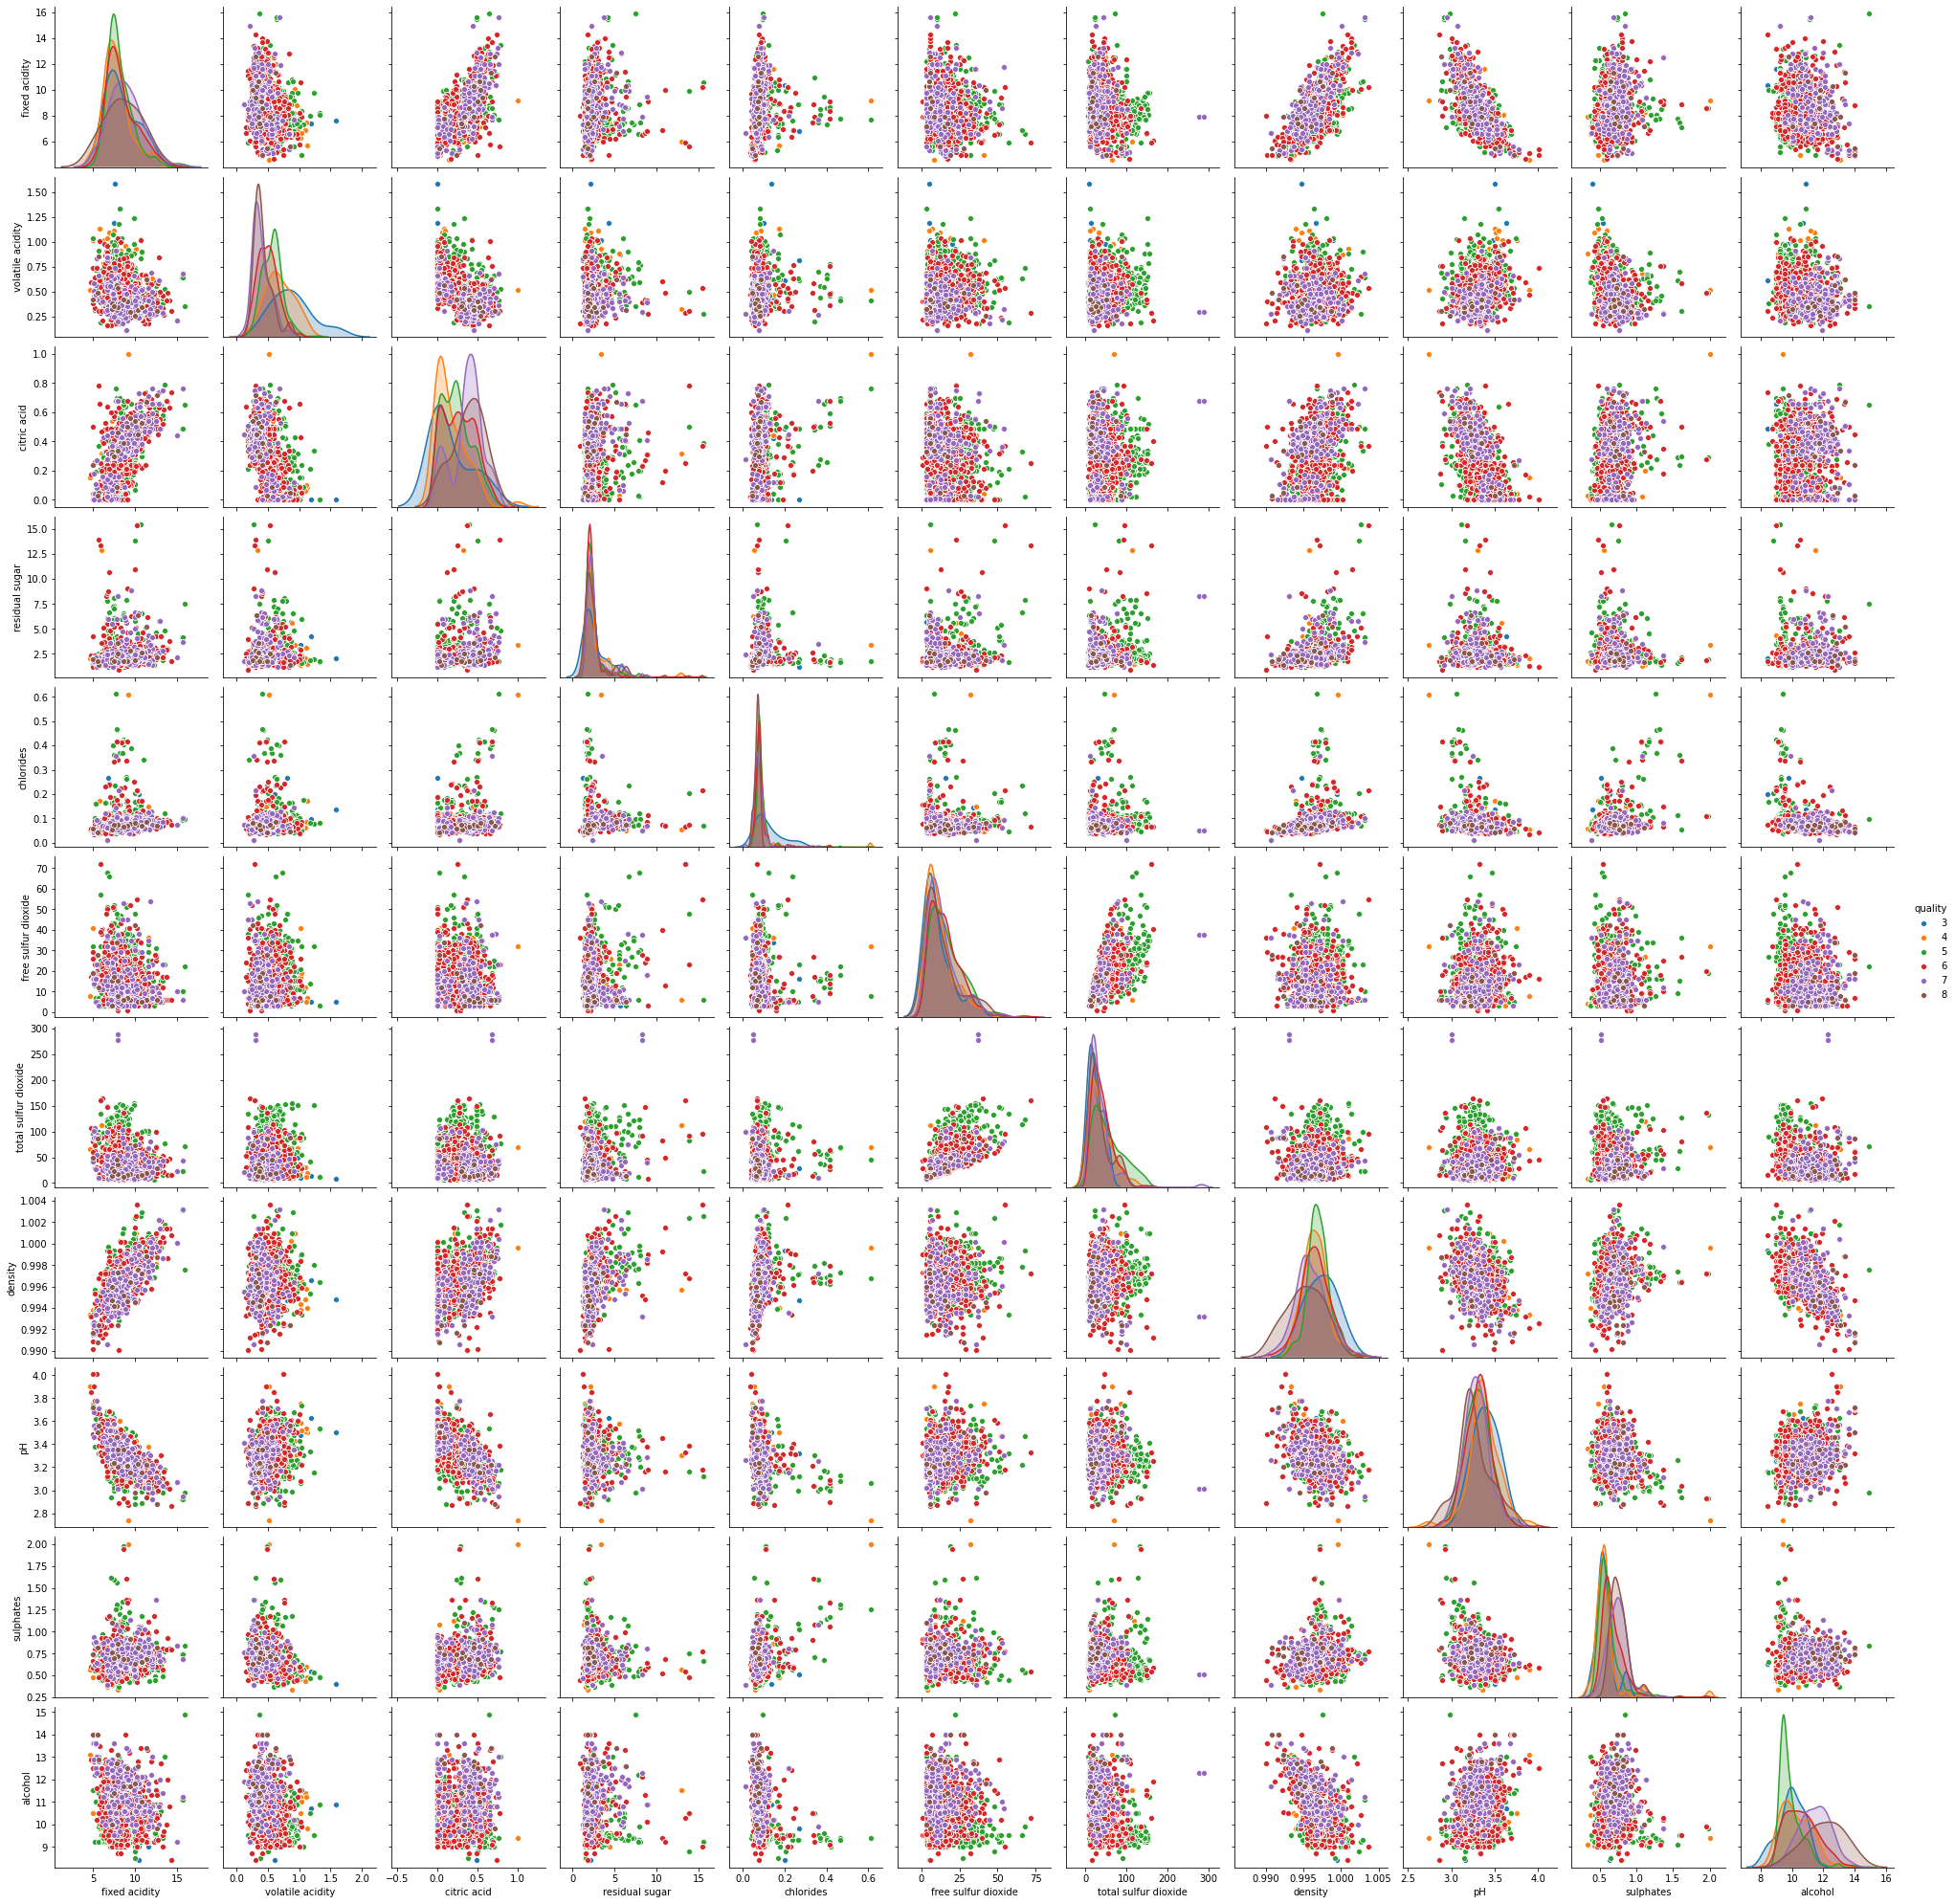

In [8]:
# Scatter matrix 
sns.pairplot(wine,hue='quality')
plt.show()

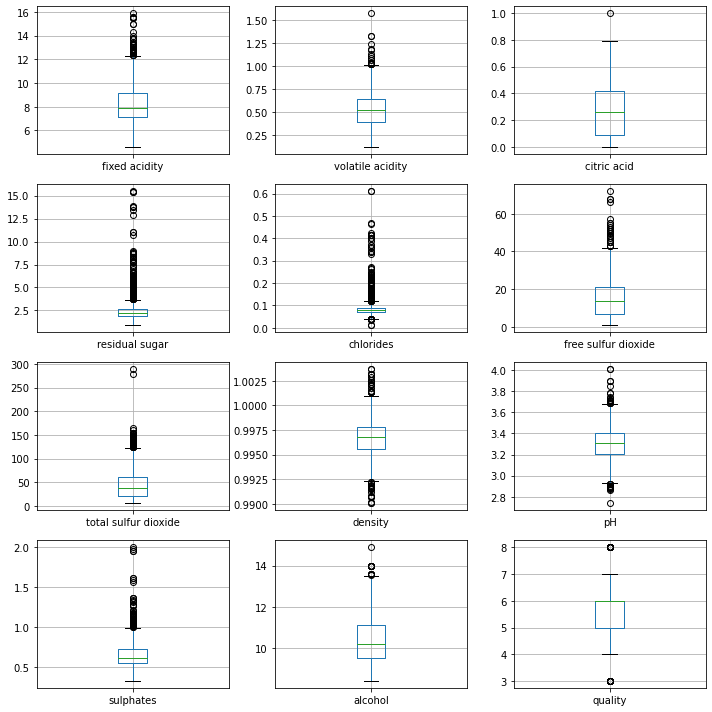

In [9]:
# Boxplots of each variable.
# Check for outlier
wine.plot(kind='box',subplots=True,layout=(4,3),grid=True,figsize=(10,10))
plt.tight_layout()
plt.show()

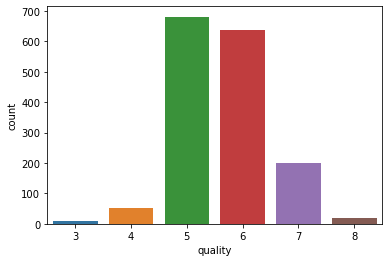

In [10]:
sns.countplot(x="quality", data=wine)
plt.show()

Finding the variable through corelation, which plays the important role in finding the quality of wine

### Coorelations and variable selaction

In [11]:
# Correlation matrix
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

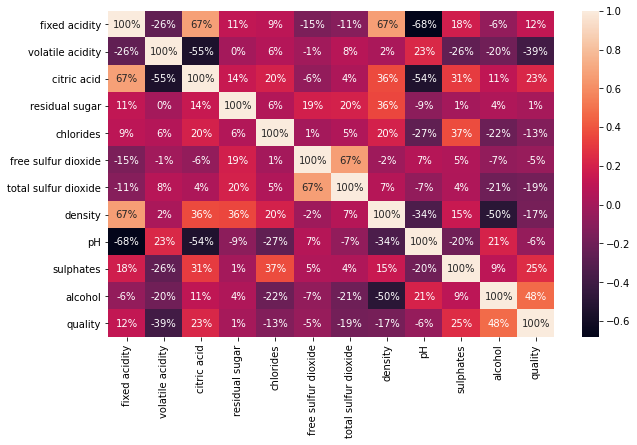

In [12]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(wine.corr(), annot=True, fmt='.0%')

In [13]:
#Calculate and order correlations
correlations = wine.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [14]:
print(abs(correlations) > 0.3)

quality                  True
alcohol                  True
sulphates               False
citric acid             False
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


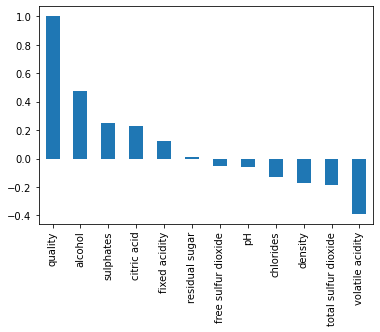

In [15]:
correlations.plot(kind='bar')

The correlation plot and the correlation coefficient show that the alcohol is positively correlated but, volatile acidity is negatively correlated. Therefore choosing these variables will be helpful since they provide more information about the quality of the wine than the other variables. Any correlated variables of less than 0.2 or 0.3 correlation coefficient are considered to be not correlated (very less correlated). Hence we used 0.3 for the threshold for the correlation coefficient.  

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

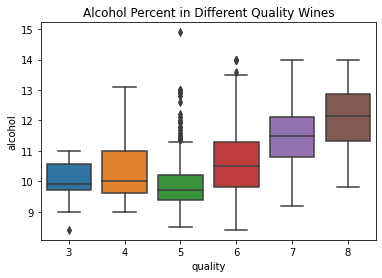

In [16]:
bp = sns.boxplot(x='quality',y='alcohol', data=wine)
bp.set(title="Alcohol Percent in Different Quality Wines")

[Text(0.5, 1.0, 'volatile acidity in Different Quality Wines')]

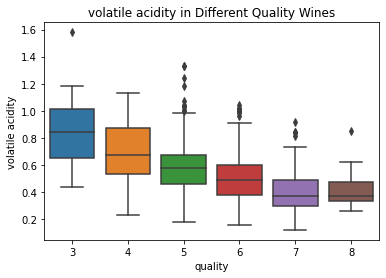

In [17]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=wine)
bp.set(title="volatile acidity in Different Quality Wines")

[Text(0.5, 1.0, 'sulphates in Different Quality Wines')]

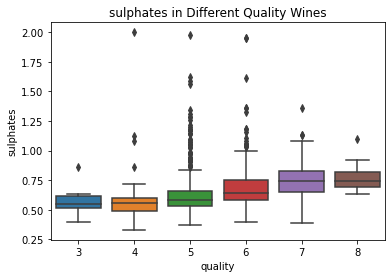

In [18]:
bp = sns.boxplot(x='quality',y='sulphates', data=wine)
bp.set(title="sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'citric acid in Different Quality Wines')]

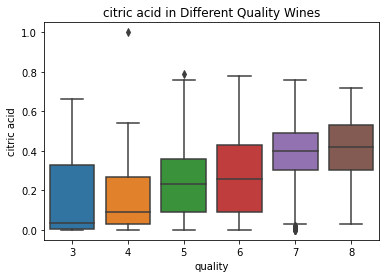

In [19]:
bp = sns.boxplot(x='quality',y='citric acid', data=wine)
bp.set(title="citric acid in Different Quality Wines")

[Text(0.5, 1.0, 'fixed acidity in Different Quality Wines')]

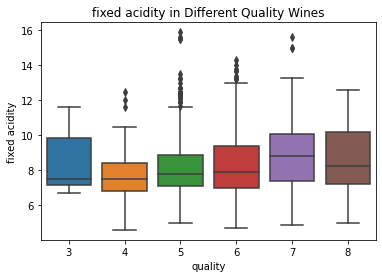

In [20]:
bp = sns.boxplot(x='quality',y='fixed acidity', data=wine)
bp.set(title="fixed acidity in Different Quality Wines")

[Text(0.5, 1.0, 'residual sugar in Different Quality Wines')]

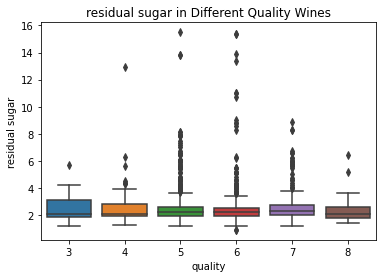

In [21]:
bp = sns.boxplot(x='quality',y='residual sugar', data=wine)
bp.set(title="residual sugar in Different Quality Wines")

[Text(0.5, 1.0, 'free sulfur dioxide in Different Quality Wines')]

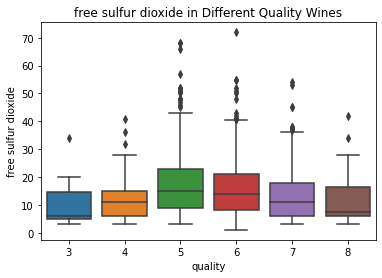

In [22]:
bp = sns.boxplot(x='quality',y='free sulfur dioxide', data=wine)
bp.set(title="free sulfur dioxide in Different Quality Wines")

[Text(0.5, 1.0, 'pH in Different Quality Wines')]

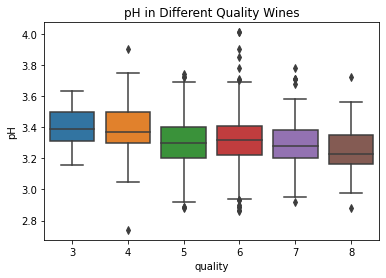

In [23]:
bp = sns.boxplot(x='quality',y='pH', data=wine)
bp.set(title="pH in Different Quality Wines")

[Text(0.5, 1.0, 'chlorides in Different Quality Wines')]

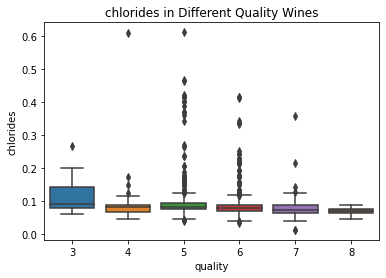

In [24]:
bp = sns.boxplot(x='quality',y='chlorides', data=wine)
bp.set(title="chlorides in Different Quality Wines")

[Text(0.5, 1.0, 'density in Different Quality Wines')]

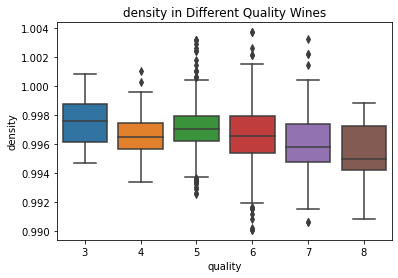

In [25]:
bp = sns.boxplot(x='quality',y='density', data=wine)
bp.set(title="density in Different Quality Wines")

[Text(0.5, 1.0, 'total sulfur dioxide in Different Quality Wines')]

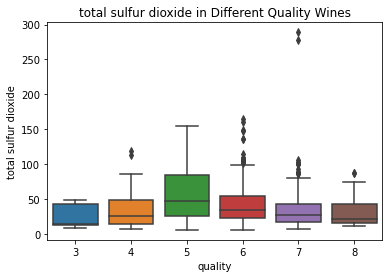

In [26]:
bp = sns.boxplot(x='quality',y='total sulfur dioxide', data=wine)
bp.set(title="total sulfur dioxide in Different Quality Wines")

Some of the variables showing lots of outliers. The box plots for fixed acidity, residual sugar, chlorides, pH, density, total sulfur dioxide and free sulfur dioxide show little variation for the different quality. Alcohol, citric acid, volatile acidity and sulphate seems to have to most variation as quality changes

### Exploring  quality variable

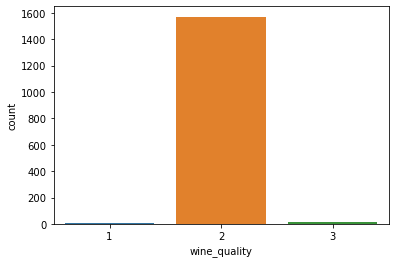

In [27]:
# Create a new column to group quality
# 1-3 -> 1, 4-7 -> 2, 8-10 -> 3
# 1 = bad, 2 = avergae, 3 = excellent


wine_quality = []
for i in wine['quality']:
    if i >= 1 and i <= 3:
        wine_quality.append('1')
    elif i >= 4 and i <= 7:
        wine_quality.append('2')
    elif i >= 8 and i <= 10:
        wine_quality.append('3')
wine['wine_quality'] = wine_quality

sns.countplot(x="wine_quality", data=wine)
plt.show()

In [28]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_quality  
0      9.4        5            2  
1      9.8        5            2  
2      9.8        5            2  
3      9.8        6            2  
4      9.4        5            2

The boxplot showing alcohol percentage in different quality wine shows that the quality of wine increases with the increase in the percent of alcohol in the data.
 The second box plot showing volatile acidity in different quality wines shows the inverse relation of volatile acidity and quality. The quality of wine increases as the percentage of volatile acidity decreases. Likewise, sulphate in different quality of wine shows that as the number of sulphate increases, there is a slight increase in the quality of the wine. The relationship is seen in the boxplot of citric acid. We also can see some outliers in those plots.Other plots for the rest of the variable does not show any relationship.


Splitting the data into test and the train in the ration of 70 to 30 percentage

In [29]:
# Seperate predictor and response variable
x = wine.loc[:, wine.columns != 'wine_quality']
x = x.loc[:, x.columns != 'quality']
y = wine.loc[:, wine.columns == 'wine_quality']


In [30]:
#We separe our features from our target feature (quality) and we split data intro training and test
X = x.loc[:,['alcohol','volatile acidity', 'citric acid', 'sulphates' ]]
Y = wine.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
print(X.shape)
print(Y.shape)

(1599, 4)
(1599,)


In [32]:
# Normalization
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 1. KNN classifier

In [33]:
from sklearn import metrics
k_range = range(1,51)
score = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score[k] = metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'testing accuracy')

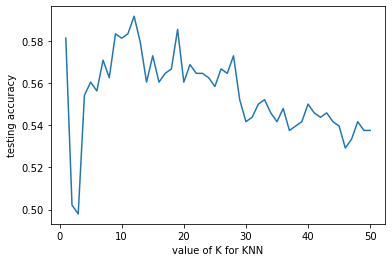

In [34]:
%matplotlib inline

#plotting the relationship between K and the testing accuracy
plt.plot(k_range,score_list)
plt.xlabel('value of K for KNN')
plt.ylabel('testing accuracy')

The testing accuracy graph indicates the accuracy is high when the value of K is around 9 to 15. However, the accuracy begin to decrease from 20 to 50. Therefore choosing the value of K of 11

In [35]:
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [36]:
# classification report
print(classification_report(y_test, y_pred))

#printing confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.74      0.66       195
           6       0.49      0.53      0.51       200
           7       0.33      0.15      0.20        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.24      0.24      0.23       480
weighted avg       0.49      0.54      0.51       480

[[  0   0   1   0   0   0]
 [  0   0  12   5   0   0]
 [  0   0 144  51   0   0]
 [  0   0  80 105  15   0]
 [  0   0   3  49   9   0]
 [  0   0   0   3   3   0]]


C:\Users\DSU\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,


In [37]:
# Model accuracy
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.642
Test set score: 0.58


# Logistic Regression

In [38]:
#Fit the model and make prediction
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

C:\Users\DSU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
C:\Users\DSU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("Default multi_class will be changed to 'auto' in"


In [39]:
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.578
Accuracy on test set: 0.535


In [40]:
# classification report
print(classification_report(y_test, lr_predict))

#printing confusion matrix
print(confusion_matrix(y_test, lr_predict))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.57      0.82      0.67       195
           6       0.50      0.48      0.49       200
           7       0.14      0.02      0.03        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.20      0.22      0.20       480
weighted avg       0.46      0.54      0.48       480

[[  0   0   1   0   0   0]
 [  0   0  13   4   0   0]
 [  0   0 159  35   1   0]
 [  0   0  99  97   4   0]
 [  0   0   7  53   1   0]
 [  0   0   0   5   1   0]]


C:\Users\DSU\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,


# Decision tree

In [55]:
#Fit the model and make prediction
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [42]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.546


In [56]:
# classification report
print(classification_report(y_test, dt_predict))

#printing confusion matrix
print(confusion_matrix(y_test, dt_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.12      0.12        17
           5       0.65      0.64      0.64       195
           6       0.54      0.57      0.55       200
           7       0.43      0.38      0.40        61
           8       0.20      0.17      0.18         6

    accuracy                           0.55       480
   macro avg       0.32      0.31      0.32       480
weighted avg       0.55      0.55      0.55       480

[[  0   0   1   0   0   0]
 [  1   2   8   6   0   0]
 [  2   8 124  56   4   1]
 [  1   4  55 114  24   2]
 [  0   1   3  33  23   1]
 [  0   0   0   2   3   1]]


# SVM 

In [53]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

In [45]:
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.633
Accuracy on test set: 0.550


In [54]:
# classification report
print(classification_report(y_test, svc_predict))

#printing confusion matrix
print(confusion_matrix(y_test, svc_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.76      0.67       195
           6       0.51      0.52      0.51       200
           7       0.43      0.20      0.27        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.26      0.25      0.24       480
weighted avg       0.51      0.55      0.52       480

[[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 148  46   1   0]
 [  0   0  84 104  12   0]
 [  0   0   4  45  12   0]
 [  0   0   0   3   3   0]]


C:\Users\DSU\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,


The model was created using the predictor variables alcohol, citric acid, volatile acid and sulphate KNN model perform the best on the test set.





#### Referances:

https://www.investopedia.com/terms/c/correlationcoefficient.asp

https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

Text-book-Introduction_to_Machine_Learning_with_Python

https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class